In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('lenna.jpg',1)

In [4]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

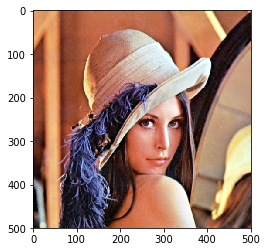

In [5]:
my_show(img)

## Gaussian Kernel

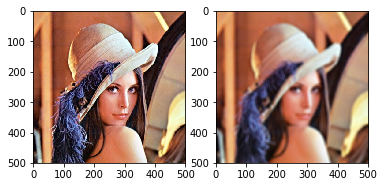

In [6]:
g_img = cv2.GaussianBlur(img,(11,11),20)#参数：img，kernelsize，方差
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(g_img)

In [7]:
kernel_1d = cv2.getGaussianKernel(11,2)#只给出了一个方向上的方差

In [8]:
g1_img = cv2.sepFilter2D(img,-1,kernel_1d,kernel_1d)#分别把x方向和y方向的卷积求出再相乘

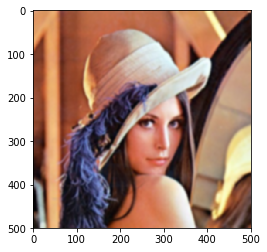

In [9]:
my_show(g1_img)

## laplacian

In [10]:
kernel_l = np.array([[0,1,0],[1,-4,1],[0,1,0]])#生成一个基础的拉普拉斯算子

In [11]:
lap_img = cv2.filter2D(img,-1,kernel_l)#实现一个拉普拉斯卷积，-1是深度（表示生成的图像和img保持一致）

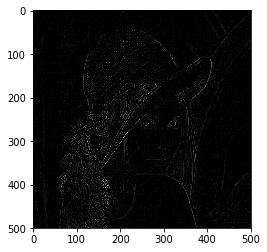

In [12]:
my_show(lap_img)#输出的是图像的边缘信息

In [13]:
kernel_strong = np.array([[1,1,1],[1,-8,1],[1,1,1]])#加强的拉普拉斯算子

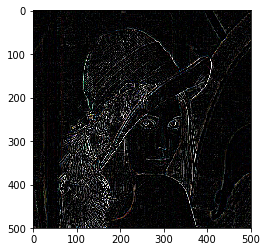

In [14]:
lapStrong_img = cv2.filter2D(img,-1,kernel_strong)#边缘信息加强了
my_show(lapStrong_img)

## 图像锐化=图像+二阶导

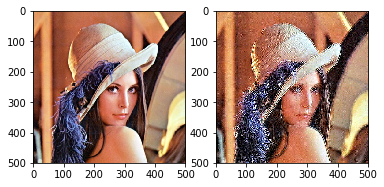

In [15]:
kernel_sharpen = np.array([[1,1,1],[1,-7,1],[1,1,1]])
sharpen_img = cv2.filter2D(img,-1,kernel_sharpen)

plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sharpen_img)

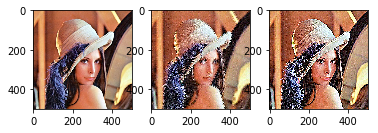

In [16]:
kernel_shapen1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])#增强版本的拉普拉斯算子
sharpen_img1 = cv2.filter2D(img,-1,kernel_shapen1)

plt.subplot(131)
my_show(img)
plt.subplot(132)
my_show(sharpen_img)
plt.subplot(133)
my_show(sharpen_img1)

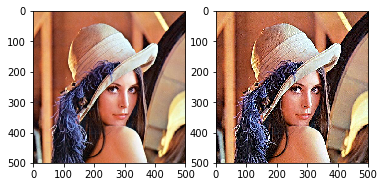

In [17]:
kernel_shapen2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])#基础版的拉普拉斯算子
sharpen_img2 = cv2.filter2D(img,-1,kernel_shapen2)

plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sharpen_img2)

## sobel 算子

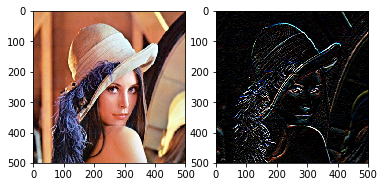

In [18]:
#一阶算子得到的边缘信息粗一些
y_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])#y方向表示横向的梯度信息
sy_img = cv2.filter2D(img,-1,y_kernel)

plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sy_img)

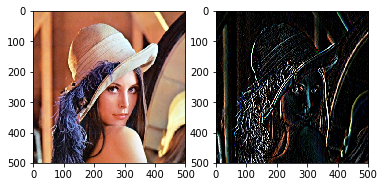

In [19]:
x_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])#x方向表示纵向的梯度信息
sx_img = cv2.filter2D(img,-1,x_kernel)

plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sx_img)

## mediamBlur

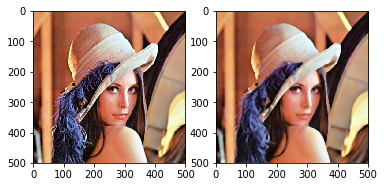

In [20]:
md_img = cv2.medianBlur(img,7)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(md_img)

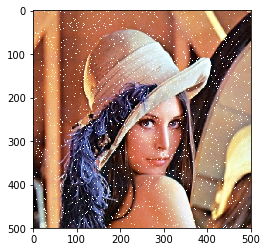

In [21]:
#椒盐噪声salt&peppr
noise_img = cv2.imread('noisy_lenna.jpg',1)
my_show(noise_img)

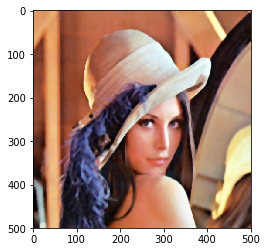

In [22]:
#中值滤波可以很好的处理椒盐噪声
denoise_img = cv2.medianBlur(noise_img,7)
my_show(denoise_img)

## Harris corner

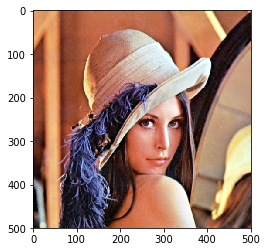

In [23]:
#判断某个图像区域是否含有角点
my_show(img)

In [24]:
#对某个图像进行角点测试必须要将他变成灰度图
img_gray = (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

In [25]:
def my_show_gray(img):
    plt.imshow(img,cmap='gray')

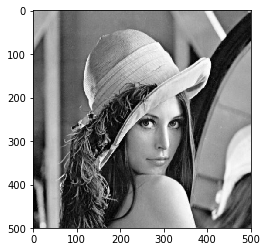

In [26]:
my_show_gray(img_gray)

In [27]:
img_harris = cv2.cornerHarris(img_gray,2,3,0.03)#原图，窗口大小，kernelsize,k值大小

In [28]:
img_harris

array([[-5.0184933e-11, -5.0184933e-11, -7.5757067e-11, ...,
         2.9226129e-07, -2.0915779e-05, -1.3639418e-05],
       [-5.0184933e-11, -5.0184933e-11, -7.5757067e-11, ...,
         2.9226129e-07, -2.0915779e-05, -1.3639418e-05],
       [ 1.0191788e-10,  1.0191788e-10,  1.4008253e-10, ...,
         3.4895913e-07, -2.4456740e-05, -1.4876613e-05],
       ...,
       [ 8.3326270e-08,  8.3326270e-08,  2.3818377e-07, ...,
         4.2201668e-07, -1.8662310e-07, -1.9364138e-07],
       [-6.7837291e-09, -6.7837291e-09,  1.6841142e-09, ...,
         1.0552327e-07,  2.5537084e-09, -5.7905471e-08],
       [-2.4616487e-08, -2.4616487e-08,  3.5491801e-08, ...,
         3.0859104e-09,  1.4322606e-08,  1.9929765e-08]], dtype=float32)

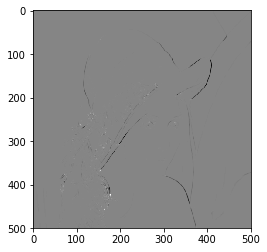

In [29]:
my_show_gray(img_harris)

In [30]:
threhold = np.max(img_harris)*0.02

In [31]:
threhold

0.00016283337026834488

In [32]:
img = cv2.imread("lenna.jpg",1)
#规定大于阈值的值都是角点
img[img_harris>threhold] = [0,0,255]

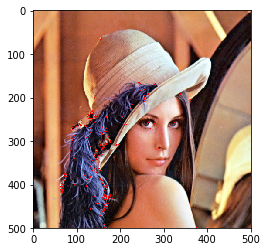

In [33]:
my_show(img)

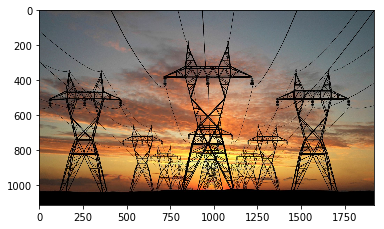

In [67]:
img_t = cv2.imread("towers.jpg",1)
my_show(img_t)

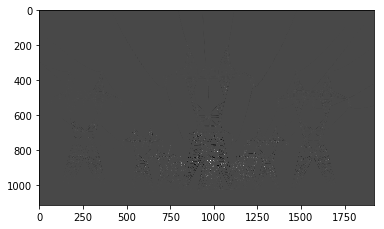

In [94]:
imgt_gray = cv2.cvtColor(img_t,cv2.COLOR_BGR2GRAY)
imgt_gray = np.float32(imgt_gray)
imgt_harris = cv2.cornerHarris(imgt_gray,2,3,0.03)
#膨胀是不会改变图像尺寸的
#膨胀是把高亮的区域扩大
imgt_harris_dilate = cv2.dilate(imgt_harris,None)
my_show_gray(imgt_harris)

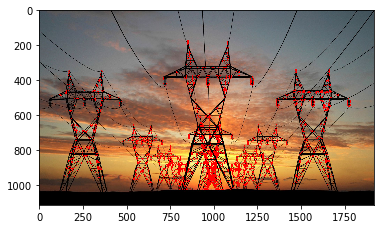

In [91]:
#定义阈值,阈值越小角点越细致
thresholdt = np.max(imgt_harris_dilate)*0.01
m = imgt_harris_dilate>thresholdt
img_t[m] = [0,0,255]
my_show(img_t)

In [52]:
cv2.xfeature2D

AttributeError: module 'cv2.cv2' has no attribute 'xfeature2D'

In [53]:
cv2.__version__

'4.1.2'